# New Section

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import plotly.express as px


In [ ]:
##!unzip "drive/MyDrive/dog-vision/dog-breed-identification.zip" -d "drive/MyDrive/dog-vision"

In [ ]:
print(hub.__version__)
print(tf.__version__)

0.16.1
2.18.0


In [ ]:
version_fn = getattr(tf.keras, "version", None)
if version_fn and version_fn().startswith("3."):
  import tf_keras as keras
else:
  keras = tf.keras

In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/dog-vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
id_per_breed = labels_csv['breed'].value_counts().reset_index()
fig = px.bar(id_per_breed, x='breed', y='count')
fig.update_layout(
    height=600,
    width=1000,
    title='Number of Images per Breed',
    xaxis_title='Breed',
    yaxis_title='Count'
)

fig.show()


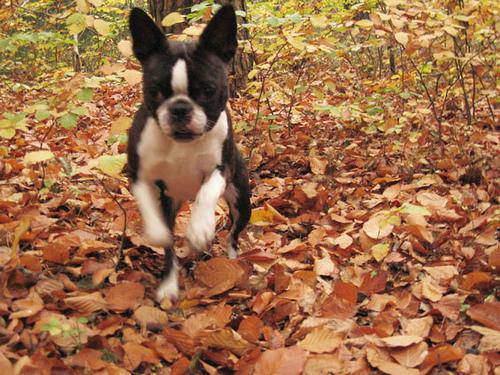

In [ ]:
from IPython.display import display, Image
Image("drive/MyDrive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [ ]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/dog-vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10 filenames
filenames[:10]

['drive/MyDrive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/dog-vision/train")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


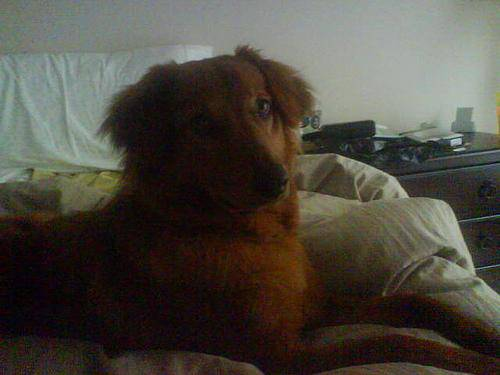

In [ ]:
# Check an image directly from a filepath
Image(filenames[1000])

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy() # convert labels column to NumPy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds),unique_breeds

(120,
 array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter'

In [ ]:
# Example: Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Example: Turning a boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0])[0][0])
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Creating our own validation set

In [ ]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

In [ ]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Check out the training data (image file paths and labels)
X_train[:5], y_train[:2]

(['drive/MyDrive/dog-vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/dog-vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/dog-vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/dog-vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/dog-vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

Preprocessing images (turning images into Tensors)

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  return image,label or in paranthesis both will return tuple
  """
  image = process_image(image_path)
  return image, label

In [ ]:
BATCH_SIZE = 32
# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch


  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    data = data.shuffle(buffer_size=len(x))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
# Create a function for viewing images in a data batch
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

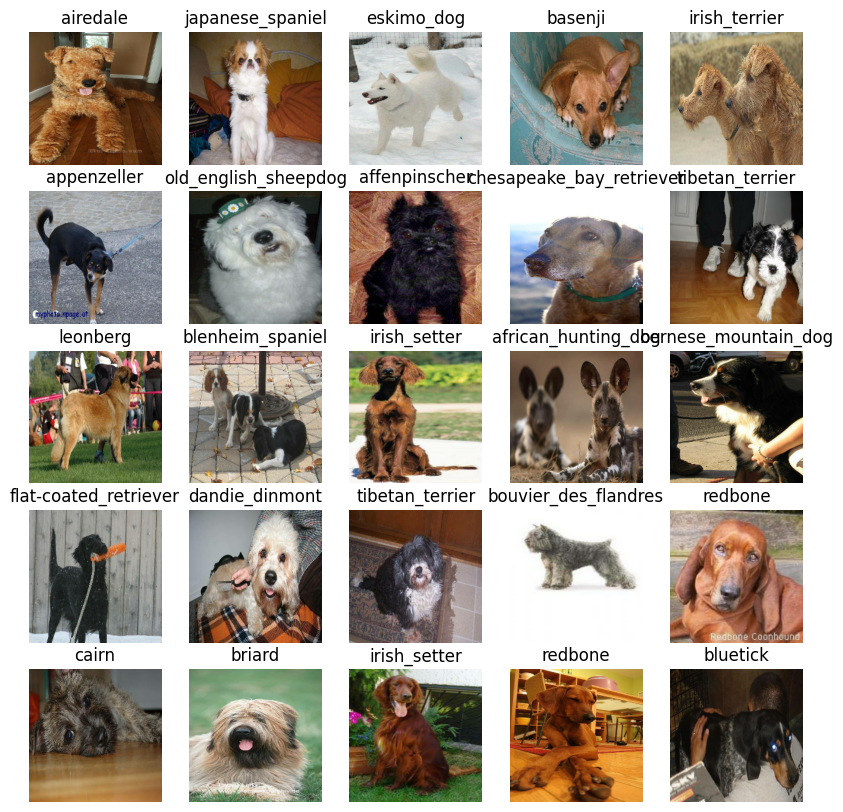

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

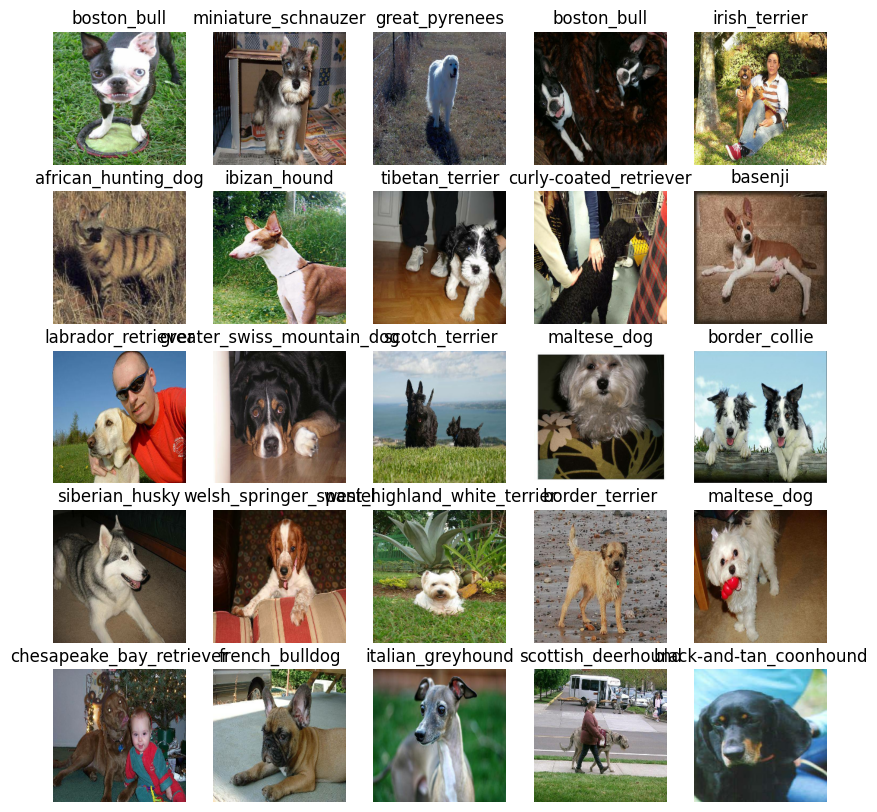

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

input fn for model

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"


creating model

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  hub_layer = hub.KerasLayer(model_url, input_shape=input_shape, trainable=False)

  model = keras.Sequential([
    hub_layer,
    keras.layers.Dense(units=output_shape, activation="softmax")
  ])
  model.compile(
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=keras.optimizers.Adam(),
      metrics=["accuracy"]
  )


  return model

In [ ]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 120)               153720    
                                                                 
Total params: 2411704 (9.20 MB)
Trainable params: 153720 (600.47 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# Create a log directory for storing TensorBoard logs
import datetime
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/dog-vision/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return keras.callbacks.TensorBoard(logdir)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [ ]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  model = create_model()
  tensorboard = create_tensorboard_callback()

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5
Epoch 1/100
25/25 [==============================] - 421s 16s/step - loss: 4.2469 - accuracy: 0.1363 - val_loss: 3.3308 - val_accuracy: 0.3100
Epoch 2/100
25/25 [==============================] - 41s 2s/step - loss: 1.7201 - accuracy: 0.6888 - val_loss: 2.1312 - val_accuracy: 0.5350
Epoch 3/100
25/25 [==============================] - 41s 2s/step - loss: 0.7413 - accuracy: 0.9150 - val_loss: 1.6567 - val_accuracy: 0.6150
Epoch 4/100
25/25 [==============================] - 42s 2s/step - loss: 0.3860 - accuracy: 0.9850 - val_loss: 1.4689 - val_accuracy: 0.6700
Epoch 5/100
25/25 [==============================] - 41s 2s/step - loss: 0.2416 - accuracy: 0.9937 - val_loss: 1.3881 - val_accuracy: 0.6700
Epoch 6/100
25/25 [==============================] - 40s 2s/step - loss: 0.1703 - accuracy: 0.9975 - val_loss: 1.3360 - val_accuracy: 0.6650
Epoch 7/100
25/25 [==============================] - 42s 2s

In [ ]:
%tensorboard --logdir drive/MyDrive/dog-vision/logs

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 9s 984ms/step


array([[2.3508535e-03, 2.9555489e-03, 1.2859110e-04, ..., 2.2705093e-04,
        7.1238115e-05, 2.1709835e-02],
       [1.3711196e-03, 5.7578939e-03, 3.8355731e-03, ..., 3.1857405e-04,
        7.0645893e-03, 4.3867076e-05],
       [3.6370288e-06, 2.8865039e-04, 4.4779867e-05, ..., 2.7435468e-04,
        3.2941072e-05, 3.2737041e-03],
       ...,
       [6.7798326e-05, 1.0940014e-04, 8.3619627e-05, ..., 2.8139359e-04,
        3.7435653e-05, 5.0139753e-04],
       [1.0657599e-04, 3.4044373e-05, 5.6451030e-05, ..., 2.5811025e-05,
        1.0973180e-05, 2.0522184e-03],
       [1.1877080e-04, 2.9035646e-05, 5.4462865e-04, ..., 5.0223526e-04,
        1.3015827e-03, 6.3101202e-04]], dtype=float32)

In [ ]:
# Check the shape of predictions
predictions.shape

(200, 120)

In [ ]:
#First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[0])}")
print(f"Max index: {np.argmax(predictions[0])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}")

[2.35085352e-03 2.95554893e-03 1.28591098e-04 6.08101800e-05
 7.13586248e-03 1.92896754e-04 2.53990926e-02 8.68753064e-04
 3.72665963e-04 6.40878643e-05 5.76287741e-04 3.14520003e-04
 2.95689570e-05 5.91273965e-05 9.04834160e-05 4.25107486e-04
 1.31933193e-05 7.78250620e-02 2.95096852e-05 7.50567939e-04
 3.62669886e-03 2.09846953e-03 1.27848369e-04 2.13129190e-03
 7.96078348e-06 1.30819378e-03 9.45164338e-02 1.44341073e-04
 1.42643054e-03 7.58745766e-04 2.09603633e-04 5.02370251e-03
 8.60787695e-05 1.05339255e-04 8.44664319e-05 1.82729550e-02
 1.99442133e-04 1.13515453e-04 1.84334531e-05 5.27133670e-05
 4.17082425e-04 1.16303847e-04 8.14786181e-05 1.23637670e-03
 3.20667859e-05 6.69302826e-04 2.19300509e-05 1.00496400e-03
 4.27603198e-04 3.26043490e-04 6.70137961e-05 1.59789735e-04
 7.44114118e-03 4.42694654e-05 6.01957945e-05 1.02630445e-04
 4.47158418e-05 2.53042136e-03 1.39369760e-04 5.85687533e-02
 5.20918635e-04 5.18762827e-05 1.30060059e-03 9.82436468e-05
 1.90704552e-04 2.454175

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[0])
pred_label

'lhasa'

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  pred_label = get_pred_label(pred_prob)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

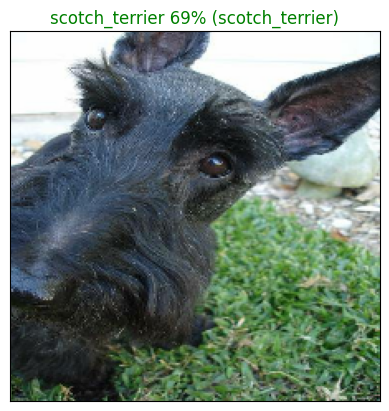

In [ ]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  pred_label = get_pred_label(pred_prob)
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]


  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")


  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

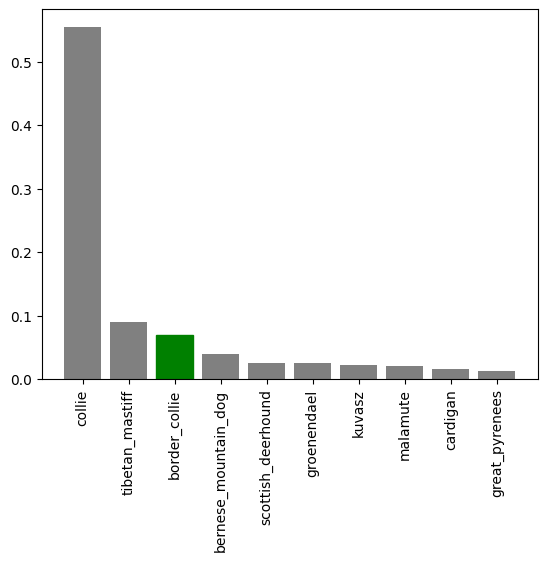

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

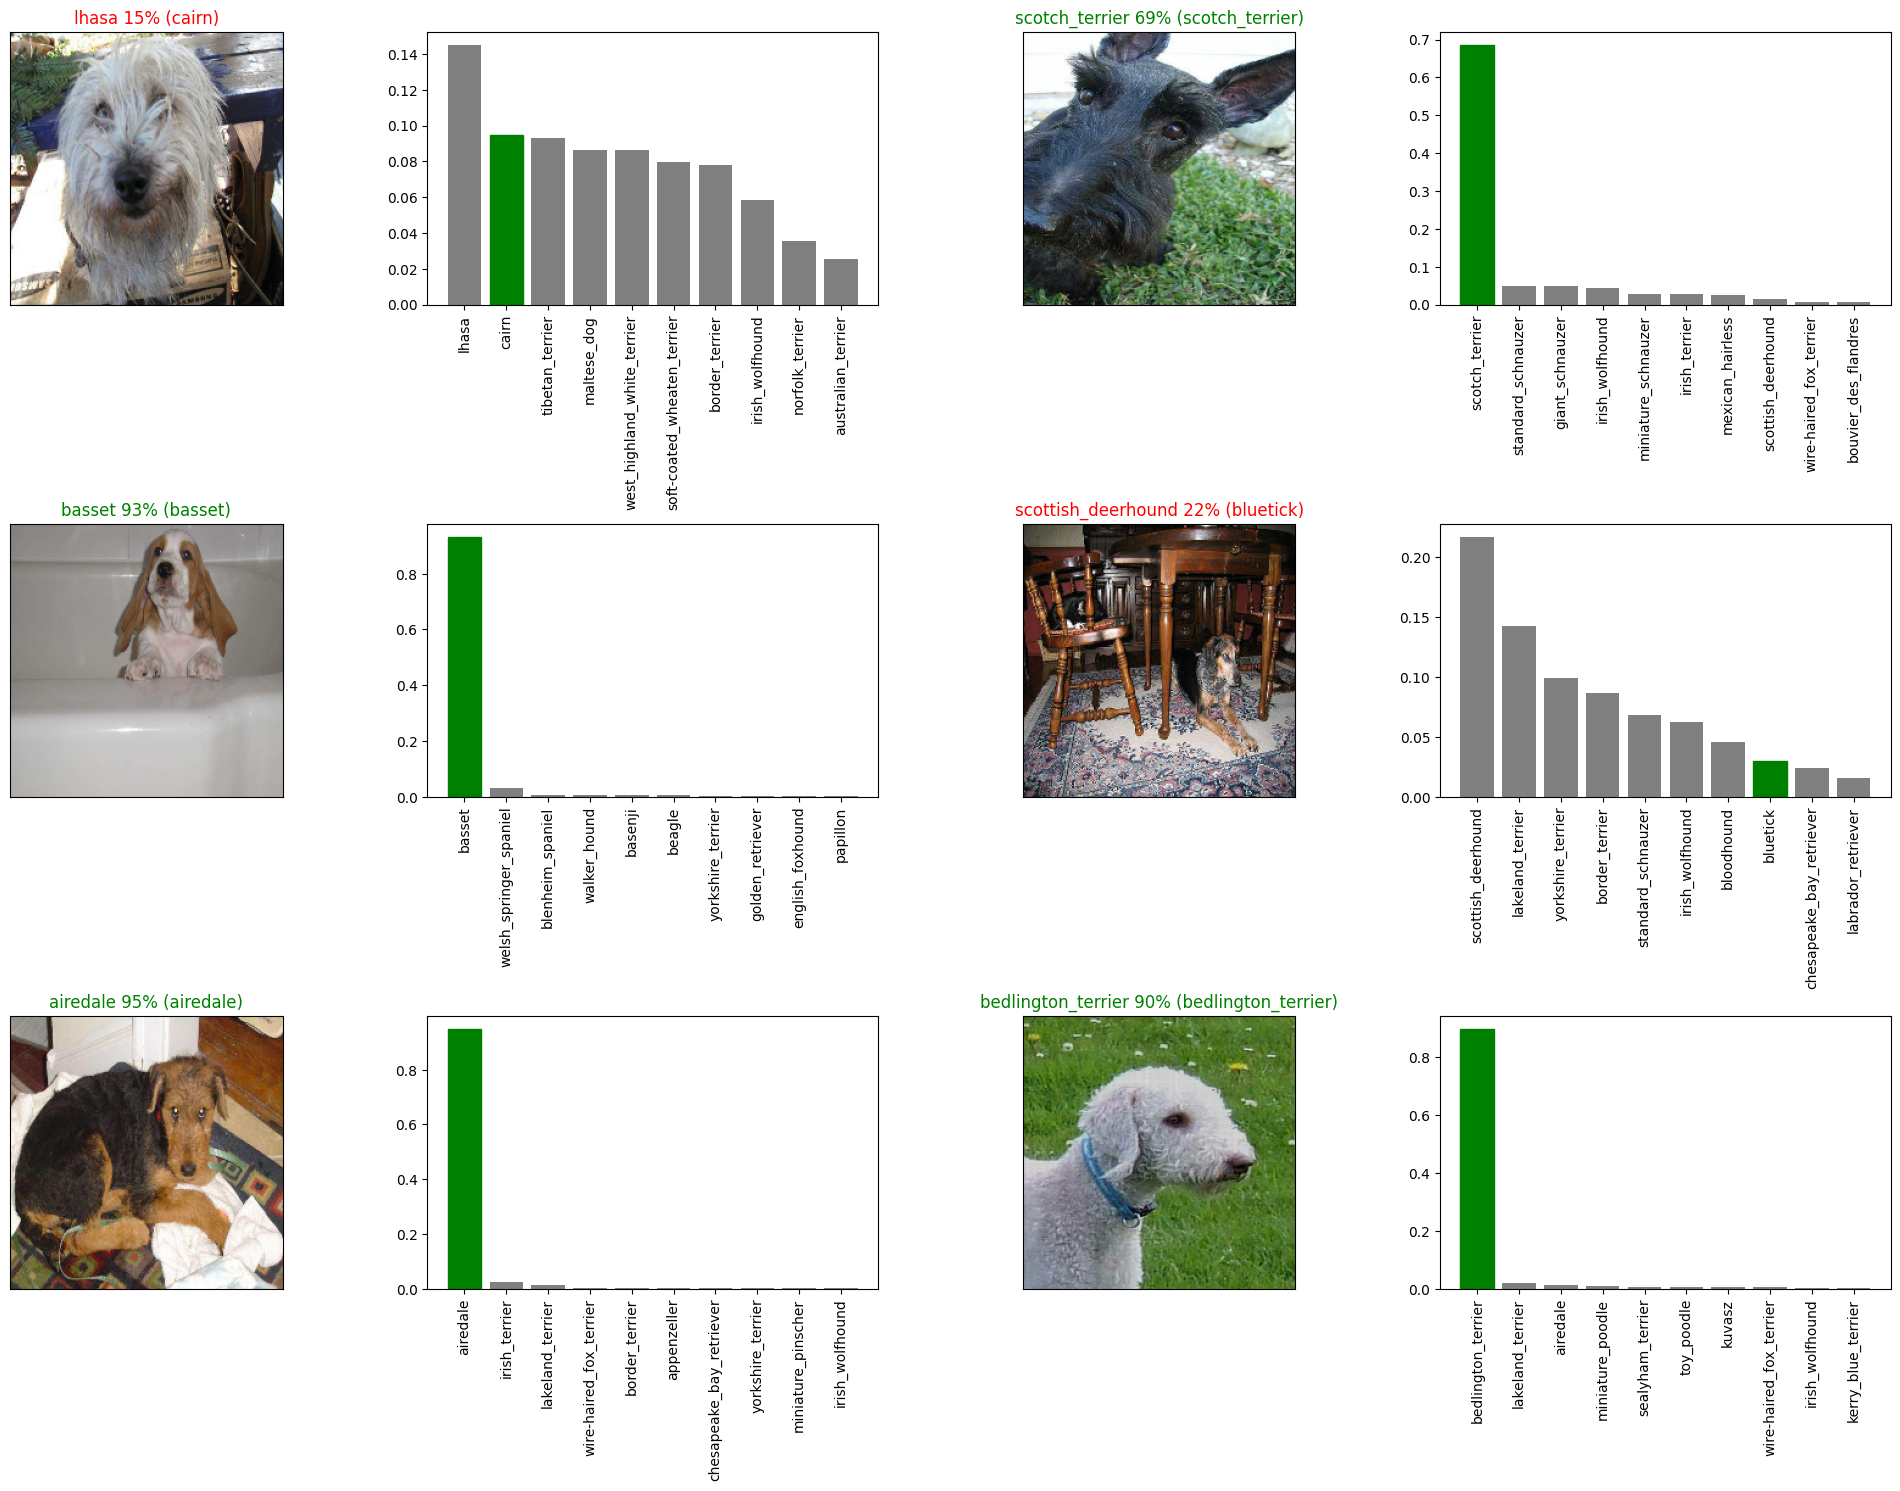

In [ ]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  modeldir = os.path.join("/content/drive/MyDrive/dog-vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" l
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
save_model(model, suffix="1000-images-Adam")

Saving model to: /content/drive/MyDrive/dog-vision/models/20250421-06231745216591-1000-images-Adam.h5...


/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.



'/content/drive/MyDrive/dog-vision/models/20250421-06231745216591-1000-images-Adam.h5'

In [ ]:
model_1000_images = load_model("drive/MyDrive/dog-vision/models/20250421-06231745216591-1000-images-Adam.h5")

Loading saved model from: drive/MyDrive/dog-vision/models/20250421-06231745216591-1000-images-Adam.h5


In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 12s 1s/step - loss: 1.1851 - accuracy: 0.7000


[1.1851072311401367, 0.699999988079071]

In [ ]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 12s 1s/step - loss: 1.1851 - accuracy: 0.7000


[1.1851072311401367, 0.699999988079071]

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5


In [ ]:
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = keras.callbacks.EarlyStopping(monitor="accuracy",                                                             patience=3)

In [ ]:
%tensorboard --logdir drive/MyDrive/dog-vision/logs

Reusing TensorBoard on port 6006 (pid 11417), started 0:27:41 ago. (Use '!kill 11417' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 409s 1s/step - loss: 1.3413 - accuracy: 0.6774
Epoch 2/100
320/320 [==============================] - 398s 1s/step - loss: 0.4126 - accuracy: 0.8849
Epoch 3/100
320/320 [==============================] - 393s 1s/step - loss: 0.2580 - accuracy: 0.9338
Epoch 4/100
320/320 [==============================] - 397s 1s/step - loss: 0.1751 - accuracy: 0.9635
Epoch 5/100
320/320 [==============================] - 396s 1s/step - loss: 0.1254 - accuracy: 0.9789
Epoch 6/100
320/320 [==============================] - 414s 1s/step - loss: 0.0914 - accuracy: 0.9868
Epoch 7/100
320/320 [==============================] - 411s 1s/step - loss: 0.0699 - accuracy: 0.9927
Epoch 8/100
320/320 [==============================] - 410s 1s/step - loss: 0.0553 - accuracy: 0.9953
Epoch 9/100
320/320 [==============================] - 417s 1s/step - loss: 0.0438 - accuracy: 0.9968
Epoch 10/100
320/320 [==============================] - 414s 1s/step - loss: 0.035

In [ ]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

Saving model to: /content/drive/MyDrive/dog-vision/models/20250421-08511745225504-all-images-Adam.h5...


'/content/drive/MyDrive/dog-vision/models/20250421-08511745225504-all-images-Adam.h5'

In [ ]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "/content/drive/MyDrive/dog-vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['/content/drive/MyDrive/dog-vision/test/e6af47e8b6973c8f8d2b9fd5af94c54d.jpg',
 '/content/drive/MyDrive/dog-vision/test/e061b8d24e7b1324a6ac92ae81fdda19.jpg',
 '/content/drive/MyDrive/dog-vision/test/e5c0666aa15120eba4718ae947a52c45.jpg',
 '/content/drive/MyDrive/dog-vision/test/e5657f523cf994628f63b673c88e9112.jpg',
 '/content/drive/MyDrive/dog-vision/test/dd5c5652d5d34e922af98c9b0295d909.jpg',
 '/content/drive/MyDrive/dog-vision/test/e14cc46044a0fb31554250b07c93bd48.jpg',
 '/content/drive/MyDrive/dog-vision/test/e386eaa78980be7183ecfdd32ecd2aab.jpg',
 '/content/drive/MyDrive/dog-vision/test/e1b0cbcf3235fe9a7b35c1652081ff8d.jpg',
 '/content/drive/MyDrive/dog-vision/test/e05367db91d0449b2afe76a1b7acc1c8.jpg',
 '/content/drive/MyDrive/dog-vision/test/de6cc38e54a460dd34c53b74f022a8da.jpg']